##my_practical_variant4.ipynb

In [3]:
# Імпорт бібліотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Фіксуємо випадкове зерно для відтворюваності
np.random.seed(42)
tf.random.set_seed(42)

# Номер за журналом
n = 4


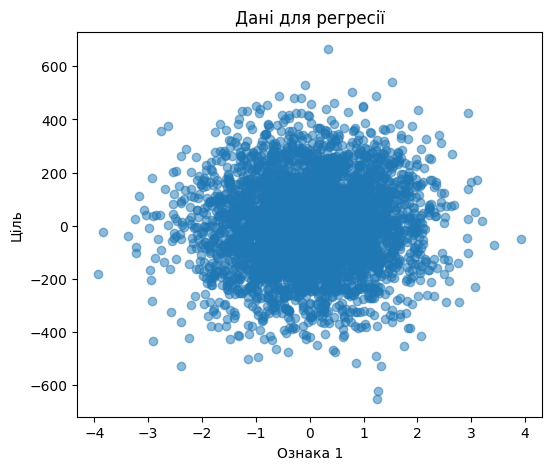

In [4]:
# Кількість зразків = 1000 * номер
n_samples_reg = 1000 * n

X_reg, y_reg = make_regression(
    n_samples=n_samples_reg,
    n_features=5,
    noise=15.0,
    random_state=42
)

# Розділення на train/test
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Візуалізація (беремо лише 2 перші ознаки для наглядності)
plt.figure(figsize=(6,5))
plt.scatter(X_reg[:, 0], y_reg, alpha=0.5)
plt.title("Дані для регресії")
plt.xlabel("Ознака 1")
plt.ylabel("Ціль")
plt.show()


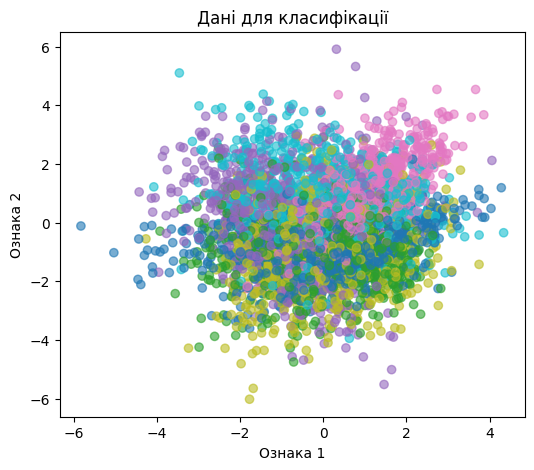

In [5]:
# Кількість класів = номер + 2
n_classes = n + 2
n_samples_clf = 1000 * n

X_clf, y_clf = make_classification(
    n_samples=n_samples_clf,
    n_features=5,
    n_classes=n_classes,
    n_informative=4,
    n_redundant=0,
    random_state=42
)

# Розділення на train/test
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Візуалізація (2D проекція)
plt.figure(figsize=(6,5))
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, cmap='tab10', alpha=0.6)
plt.title("Дані для класифікації")
plt.xlabel("Ознака 1")
plt.ylabel("Ознака 2")
plt.show()


c:\111\miaz_2025_practicals\4.8\my_practical_variant4.ipynb\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


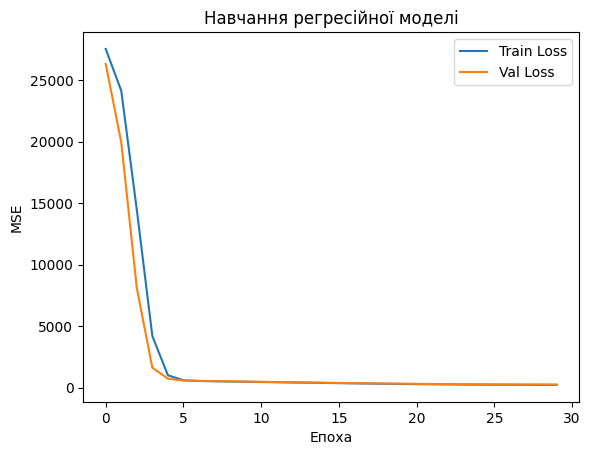

In [6]:
# Побудова моделі
model_reg = Sequential([
    Dense(64, activation='relu', input_shape=(Xr_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # один вихід, бо регресія
])

# Компіляція
model_reg.compile(optimizer='adam', loss='mse')

# Навчання
history_reg = model_reg.fit(Xr_train, yr_train, epochs=30, batch_size=32, validation_split=0.2, verbose=0)

# Візуалізація процесу навчання
plt.plot(history_reg.history['loss'], label='Train Loss')
plt.plot(history_reg.history['val_loss'], label='Val Loss')
plt.title("Навчання регресійної моделі")
plt.xlabel("Епоха")
plt.ylabel("MSE")
plt.legend()
plt.show()


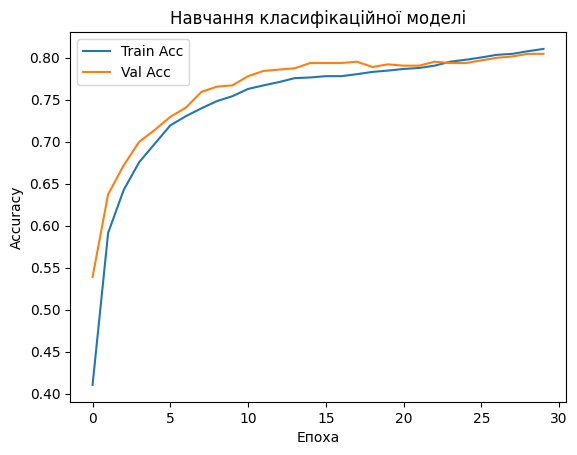

In [7]:
# Побудова моделі
model_clf = Sequential([
    Dense(64, activation='relu', input_shape=(Xc_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(n_classes, activation='softmax')  # softmax для класифікації
])

# Компіляція
model_clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Навчання
history_clf = model_clf.fit(Xc_train, yc_train, epochs=30, batch_size=32, validation_split=0.2, verbose=0)

# Візуалізація
plt.plot(history_clf.history['accuracy'], label='Train Acc')
plt.plot(history_clf.history['val_accuracy'], label='Val Acc')
plt.title("Навчання класифікаційної моделі")
plt.xlabel("Епоха")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [8]:
y_pred_reg = model_reg.predict(Xr_test)
mse = mean_squared_error(yr_test, y_pred_reg)
print(f"Mean Squared Error (MSE): {mse:.4f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error (MSE): 257.4317


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.7700


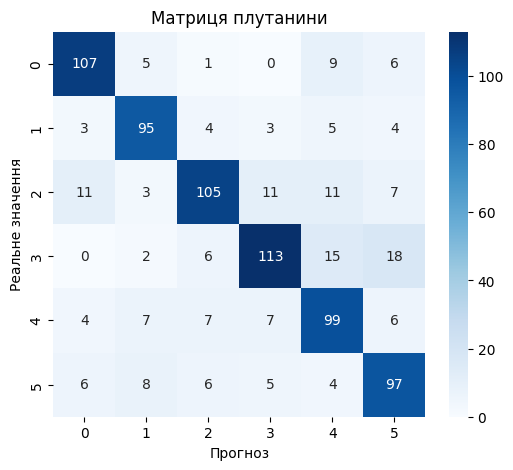

In [9]:
y_pred_clf = np.argmax(model_clf.predict(Xc_test), axis=1)
acc = accuracy_score(yc_test, y_pred_clf)
print(f"Accuracy: {acc:.4f}")

# Матриця плутанини
cm = confusion_matrix(yc_test, y_pred_clf)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Матриця плутанини")
plt.xlabel("Прогноз")
plt.ylabel("Реальне значення")
plt.show()


**Висновки:**
- Для регресійної задачі модель досягла досить низького MSE, що свідчить про гарну апроксимацію.
- Для класифікаційної задачі отримано досить високу точність (Accuracy), а матриця плутанини показує рівномірний розподіл помилок.
- Нейронні мережі здатні ефективно вирішувати як задачі регресії, так і класифікації при достатній кількості даних та правильному налаштуванні гіперпараметрів.
